In [23]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import seaborn as sns
from sklearn import linear_model
# Load the dataset
credit = pd.read_csv("Credit.csv")




In [24]:
# Show the top 5 rows of the dataset
credit.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [25]:
# Show the data info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


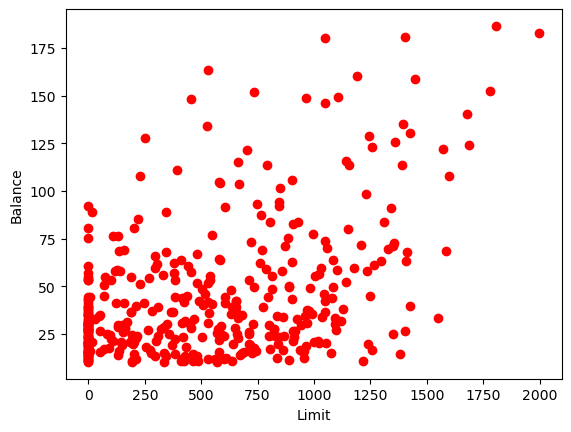

In [26]:
# We can use scatter plot the visualize the relationship first.
plt.xlabel('Limit')
plt.ylabel('Balance')
plt.scatter(credit.Balance,credit.Income,color='red')

# Simple Linear Regression

In [27]:
# Analyzing effect of Limit on Balance
model = smf.ols('Balance ~ Income',credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.03e-22
Time:                        12:32:47   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Use residual plots to check model assumptions

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

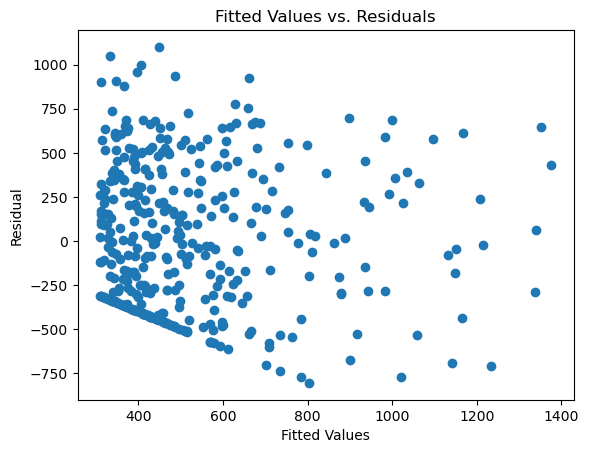

In [28]:

#Fitted Values vs. Residuals
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

#### The error terms has constant variance or not: significant change in the bandwidth might suggest violation.
#### The error terms are independent or not: significant patterns might suggest violation.
#### Potential problems: two patterns might suggest sample came from different populations.

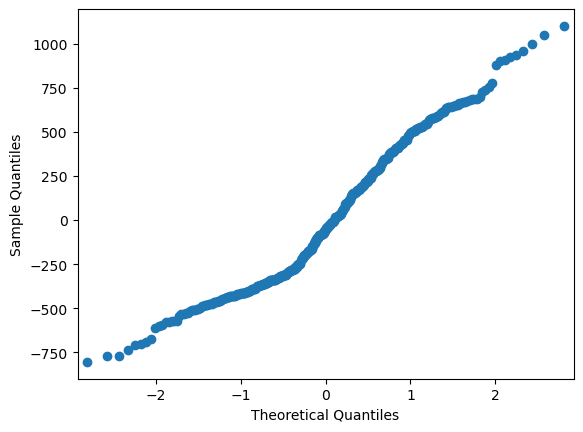

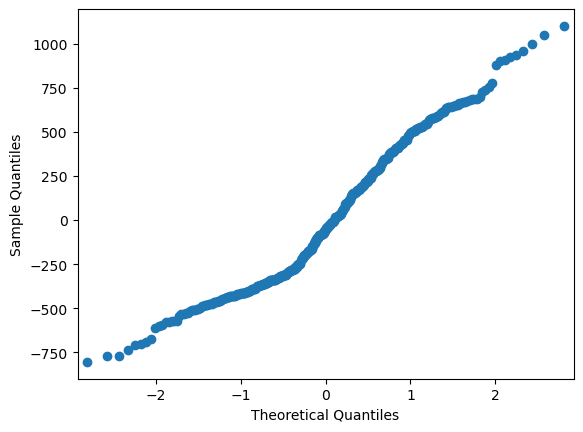

In [29]:
#qq plot
sm.qqplot(model.resid)

### A QQ plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

# Multiple Linear Regression 

### VIF measures how much the variance is inflated with coefficent estimates

In [30]:

#Detect Multicollinearity 
y, X = dmatrices('Balance~Income + Limit + Rating + Cards + Age + Education + C(Gender) + C(Student) + C(Married) + C(Ethnicity)', data=credit, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                   features
0    52.451853                  Intercept
1     1.005849        C(Gender)[T.Female]
2     1.031517          C(Student)[T.Yes]
3     1.044638          C(Married)[T.Yes]
4     1.552157      C(Ethnicity)[T.Asian]
5     1.527504  C(Ethnicity)[T.Caucasian]
6     2.786182                     Income
7   234.028100                      Limit
8   235.848259                     Rating
9     1.448690                      Cards
10    1.051410                        Age
11    1.019588                  Education


### Limit and Rating are highly correlated

In [31]:
#delete Limit, much better. 
y, X_new = dmatrices('Balance~Income + Rating + Cards + Age + Education + C(Gender) + C(Student) + C(Married) + C(Ethnicity)', data=credit, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
print(vif)

    VIF Factor                   features
0    46.513331                  Intercept
1     1.005848        C(Gender)[T.Female]
2     1.022092          C(Student)[T.Yes]
3     1.032237          C(Married)[T.Yes]
4     1.546515      C(Ethnicity)[T.Asian]
5     1.527415  C(Ethnicity)[T.Caucasian]
6     2.784966                     Income
7     2.730561                     Rating
8     1.019639                      Cards
9     1.051135                        Age
10    1.013503                  Education


In [32]:
#fit initial model 
model =smf.ols('Balance~Income + Rating + Cards + Age + Education + C(Gender) + C(Student) + C(Married) + C(Ethnicity)',data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          4.46e-248
Time:                        12:32:47   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -549.3140     35.085    -15.657      0.000    -618.293    -480.335
C(Gender)[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
C(Student)[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
C(Married)[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
C(Ethnicity)[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
C(Ethnicity)[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                       -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                        3.9790      0.055     72.332      0.000       3.871       4.087
Cards                         3.9654      3.793      1.045      0.296      -3.492      11.422
Age                          -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                    -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,3.889191e+04,3.889191e+04,3.674056,5.599789e-02
C(Student),1.0,5.623889e+06,5.623889e+06,531.279662,9.726725e-75
C(Married),1.0,1.697586e+04,1.697586e+04,1.603682,2.061399e-01
C(Ethnicity),2.0,5.803784e+04,2.901892e+04,2.741370,6.572798e-02
Income,1.0,1.770771e+07,1.770771e+07,1672.818104,5.961200e-143
Rating,1.0,5.671987e+07,5.671987e+07,5358.233825,1.419947e-229
Cards,1.0,9.510834e+03,9.510834e+03,0.898473,3.437800e-01
Age,1.0,4.669332e+04,4.669332e+04,4.411042,3.635038e-02
Education,1.0,5.548063e+02,5.548063e+02,0.052412,8.190391e-01
Residual,389.0,4.117780e+06,1.058555e+04,NaN,NaN


In [34]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Gender),1.139094e+04,1.0,1.076084,3.002197e-01
C(Student),6.108187e+06,1.0,577.030470,7.626382e-79
C(Married),2.099737e+04,1.0,1.983588,1.598117e-01
C(Ethnicity),2.328360e+04,2.0,1.099782,3.339766e-01
Income,1.075687e+07,1.0,1016.183583,1.540843e-110
Rating,5.538293e+07,1.0,5231.935313,1.070543e-227
Cards,1.157028e+04,1.0,1.093025,2.964511e-01
Age,4.649474e+04,1.0,4.392283,3.674773e-02
Education,5.548063e+02,1.0,0.052412,8.190391e-01
Residual,4.117780e+06,389.0,NaN,NaN


In [35]:
model_2 =smf.ols('Balance ~ Income + Rating + C(Student) ',data=credit).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          6.23e-257
Time:                        12:32:47   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -581.0789     13.835    -42.002      0.000    -608.277    -553.880
C(Student)[T.Yes]   418.7603     17.230     24.304      0.000     384.886     452.634
Income               -7.8749      0.240    -32.783      0.000      -8.347      -7.403
Rating                3.9875      0.055     72.888      0.000       3.880       4.095
==============================================================================
Omnibus:                       13.580   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.236
Skew:                           0.445   Prob(JB):                     0.000810
Kurtosis:                       2.750   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
sm.stats.anova_lm(model_2, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Student),1.0,5.658372e+06,5.658372e+06,530.068410,4.693333e-75
Income,1.0,1.774249e+07,1.774249e+07,1662.091302,8.445244e-144
Rating,1.0,5.671183e+07,5.671183e+07,5312.685421,1.471786e-231
Residual,396.0,4.227219e+06,1.067480e+04,NaN,NaN


In [37]:
sm.stats.anova_lm(model_2, typ=2)

,sum_sq,df,F,PR(>F)
C(Student),6.305322e+06,1.0,590.673755,1.624731e-80
Income,1.147274e+07,1.0,1074.750234,6.941803e-115
Rating,5.671183e+07,1.0,5312.685421,1.471786e-231
Residual,4.227219e+06,396.0,NaN,NaN
